In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## hssm installation
!pip install hssm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.1/384.1 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found ex

In [4]:
!pip install blackjax graphviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 21.0 MB/s eta 0:00:00


In [5]:
import hssm
import jax

# Check if JAX sees the Colab GPU/TPU
print(f"HSSM Version: {hssm.__version__}")
print(f"JAX Devices: {jax.devices()}")

HSSM Version: 0.2.11
JAX Devices: [CudaDevice(id=0)]


In [26]:
data_pre = pd.read_csv('/content/trial_wise_dataset_pre.csv')
data_post = pd.read_csv('/content/trial_wise_dataset_post.csv')
data = pd.concat([data_pre, data_post], axis=0, ignore_index=True)
data.head()

,Participant_ID,patch_id,participant,TreeNumber,TimeElapsed,Decision,ReactionTime,Reward,increasing_reward_per_patch,TotalCumulativeReward,HandlingTime,CumulativeRewardPerPatch,AvgRewardRate,stim,stim_cat,TravelTime,env,trait_anxiety_score,State_Anxiety_Score_Pre,State_Anxiety_Score_Post
0,p1,1,1,1,4.861029,stay,0.477220,91,91,91,4.861029,376,18.720318,0,pre,3,1,37,30,46
1,p1,1,1,1,9.333118,stay,0.732677,90,181,181,4.472090,376,19.393304,0,pre,3,1,37,30,46
2,p1,1,1,1,13.125660,stay,0.441761,73,254,254,3.792542,376,19.351408,0,pre,3,1,37,30,46
3,p1,1,1,1,17.557925,stay,0.607482,67,321,321,4.432265,376,18.282342,0,pre,3,1,37,30,46
4,p1,1,1,1,20.566924,stay,0.499781,55,376,376,3.008999,376,18.281781,0,pre,3,1,37,30,46


In [27]:
data = data.drop(columns=["Participant_ID"])

data = data.rename(columns={
    "participant": "subj_idx",
    "ReactionTime": "rt",
    "Reward":"reward"
})

data["response"] = data["Decision"].map({
    "stay": 1,
    "leave": 0
})

data = data.drop(columns=["Decision","stim_cat"])


rt_min = data["rt"].min()
rt_max = data["rt"].max()

print("Min rt:", rt_min)
print("Max rt:", rt_max)

Min rt: 0.0
Max rt: 5.29678720000084


In [28]:
data = data[(data["rt"] > 0) & (data["rt"] <= 3)]

In [29]:
data.head()

,patch_id,subj_idx,TreeNumber,TimeElapsed,rt,reward,increasing_reward_per_patch,TotalCumulativeReward,HandlingTime,CumulativeRewardPerPatch,AvgRewardRate,stim,TravelTime,env,trait_anxiety_score,State_Anxiety_Score_Pre,State_Anxiety_Score_Post,response
0,1,1,1,4.861029,0.477220,91,91,91,4.861029,376,18.720318,0,3,1,37,30,46,1
1,1,1,1,9.333118,0.732677,90,181,181,4.472090,376,19.393304,0,3,1,37,30,46,1
2,1,1,1,13.125660,0.441761,73,254,254,3.792542,376,19.351408,0,3,1,37,30,46,1
3,1,1,1,17.557925,0.607482,67,321,321,4.432265,376,18.282342,0,3,1,37,30,46,1
4,1,1,1,20.566924,0.499781,55,376,376,3.008999,376,18.281781,0,3,1,37,30,46,1


In [30]:
# Convert 0s to -1s so HSSM sees {-1, 1} instead of {0, 1}
data['response'] = data['response'].replace(0, -1)

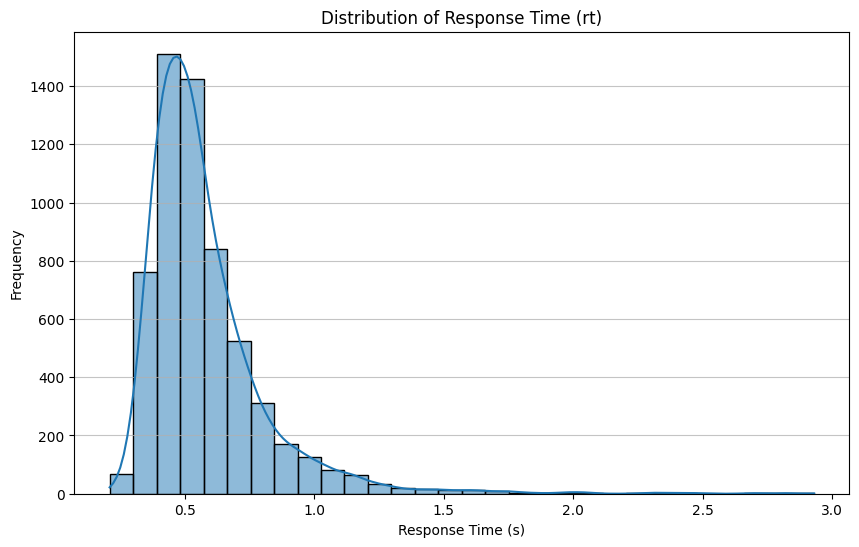

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['rt'], bins=30, kde=True)
plt.title('Distribution of Response Time (rt)')
plt.xlabel('Response Time (s)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [32]:
import numpy as np
from scipy.stats import zscore


exclude_cols = ["rt", "subj_idx","response"]

numeric_cols = data.select_dtypes(include=np.number).columns

cols_to_zscore = [col for col in numeric_cols if col not in exclude_cols]

for col in cols_to_zscore:
    data[f"z_{col}"] = zscore(data[col])


data.head()

,patch_id,subj_idx,TreeNumber,TimeElapsed,rt,reward,increasing_reward_per_patch,TotalCumulativeReward,HandlingTime,CumulativeRewardPerPatch,...,z_TotalCumulativeReward,z_HandlingTime,z_CumulativeRewardPerPatch,z_AvgRewardRate,z_stim,z_TravelTime,z_env,z_trait_anxiety_score,z_State_Anxiety_Score_Pre,z_State_Anxiety_Score_Post
0,1,1,1,4.861029,0.477220,91,91,91,4.861029,376,...,-1.415490,0.443229,-0.834338,-0.632990,-1.043528,-1.162449,-0.916635,-0.429794,-0.357444,0.162968
1,1,1,1,9.333118,0.732677,90,181,181,4.472090,376,...,-1.381255,0.292826,-0.834338,-0.575300,-1.043528,-1.162449,-0.916635,-0.429794,-0.357444,0.162968
2,1,1,1,13.125660,0.441761,73,254,254,3.792542,376,...,-1.353487,0.030045,-0.834338,-0.578891,-1.043528,-1.162449,-0.916635,-0.429794,-0.357444,0.162968
3,1,1,1,17.557925,0.607482,67,321,321,4.432265,376,...,-1.328000,0.277426,-0.834338,-0.670535,-1.043528,-1.162449,-0.916635,-0.429794,-0.357444,0.162968
4,1,1,1,20.566924,0.499781,55,376,376,3.008999,376,...,-1.307079,-0.272950,-0.834338,-0.670583,-1.043528,-1.162449,-0.916635,-0.429794,-0.357444,0.162968


In [33]:
import hssm
import arviz as az

def run_hssm_model(df, samples=5000, burn=1000, chains=4, save_name="ms4_hssm"):
    """
    HSSM equivalent of the HDDM ms4 model.
    Matches all modeling assumptions except inference engine.
    """

    print(f"Initializing HSSM model: {save_name}")

    # --- Regression formulas (GROUP-LEVEL ONLY) ---
    # Equivalent to: group_only_regressors=True in HDDM

    v_formula = "v ~ 1 + z_reward + z_TravelTime + z_trait_anxiety_score"
    a_formula = "a ~ 1 + z_reward + z_TravelTime + z_trait_anxiety_score"
    z_formula = "z ~ 1"  # z included, not regressed (matches HDDM include=['z'])

    # --- Initialize Model ---
    model = hssm.HSSM(
        data=df,
        model="ddm",
        loglik_kind="analytical",
        include=[
            {"name": "v", "formula": v_formula},
            {"name": "a", "formula": a_formula},
            {"name": "z", "formula": z_formula},
        ],
        p_outlier=0.05  # EXACT match to HDDM
    )

    # --- Sampling ---
    print(f"Sampling with {chains} chains using NUTS (NumPyro backend)...")

    infer_data = model.sample(
        sampler="nuts_numpyro",
        draws=samples,
        tune=burn,
        chains=chains,
        cores=chains,
        target_accept=0.9
    )

    # --- Save Output ---
    save_path = f"{save_name}.nc"
    infer_data.to_netcdf(save_path)
    print(f"Model saved to {save_path}")

    return model, infer_data


In [ ]:
# Run it
model, trace = run_hssm_model(data)

# --- BLOCK 3: Inspect Results ---
print("\n--- Summary Statistics (Top 5 rows) ---")
print(az.summary(trace))

az.plot_forest(
    trace,
    var_names=[
        "v_z_reward", "v_c_travel_time", "v_z_trait_anxiety",
        "a_z_reward", "a_c_travel_time", "a_z_trait_anxiety"
    ],
    combined=True
)


Initializing HSSM model: ms4_hssm
Model initialized successfully.


INFO:hssm:Model initialized successfully.


Sampling with 4 chains using NUTS (NumPyro backend)...
Using default initvals. 



INFO:hssm:Using default initvals. 

warmup:   1%|          | 54/6000 [00:01<03:11, 31.01it/s, 63 steps of size 3.97e-03. acc. prob=0.84]

No posterior_predictive samples found. Generating posterior_predictive samples using the provided InferenceData object and the original data. This will modify the provided InferenceData object, or if not provided, the traces object stored inside the model.


INFO:hssm:No posterior_predictive samples found. Generating posterior_predictive samples using the provided InferenceData object and the original data. This will modify the provided InferenceData object, or if not provided, the traces object stored inside the model.


<Axes: title={'center': 'Posterior Predictive Distribution'}, xlabel='Response Time', ylabel='Density'>

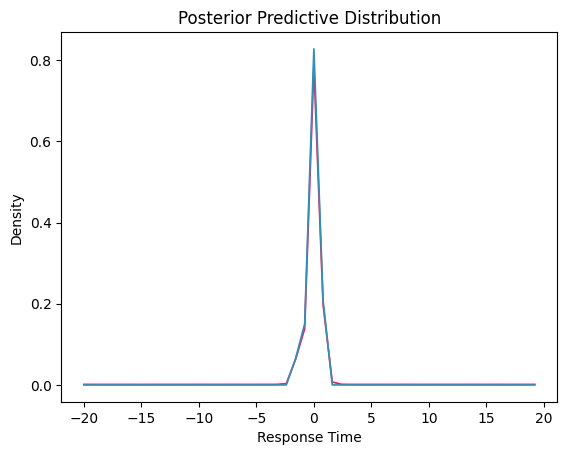

In [ ]:
model.plot_predictive()

<Axes: xlabel='rt,response'>

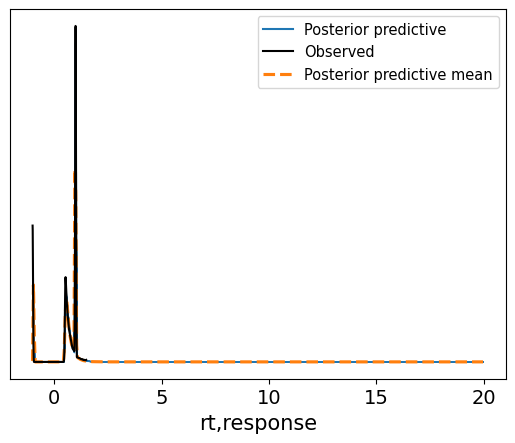

In [ ]:
az.plot_ppc(trace)

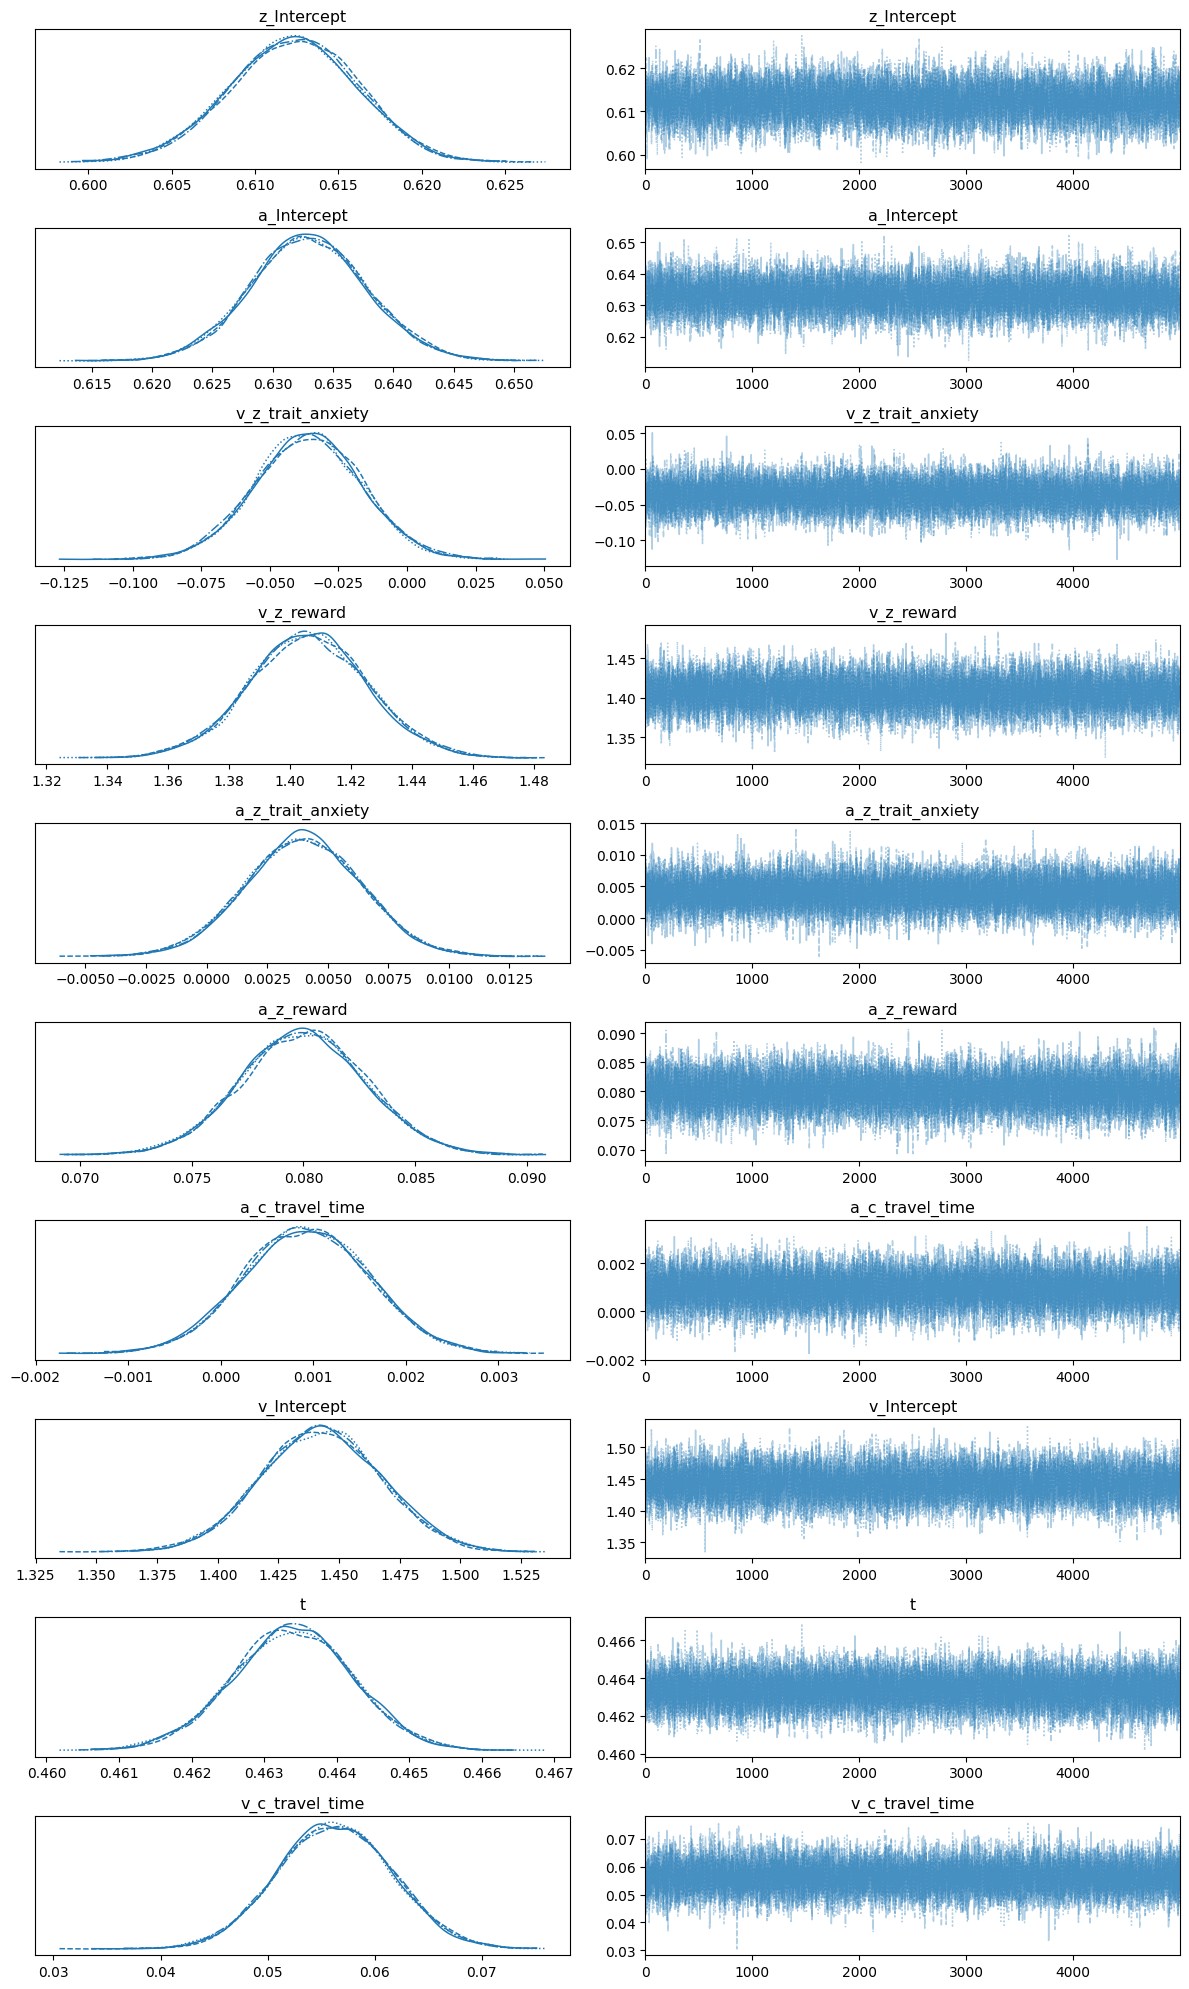

In [ ]:
model.plot_trace()

In [ ]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

def assess_hssm_performance(trace_data):
    idata = trace_data

    print("\n" + "="*40)
    print("1. CONVERGENCE DIAGNOSTICS (Technical Health)")
    print("="*40)

    # We calculate summary stats to get R-hat and ESS for all parameters
    summary = az.summary(idata)

    # --- R-hat Check ---
    # Ideal: 1.0. Acceptable < 1.01 (or 1.05 loosely).
    max_rhat = summary['r_hat'].max()
    print(f"Max R-hat: {max_rhat:.4f}")
    if max_rhat > 1.05:
        print(" [!] WARNING: Some chains did not converge (R-hat > 1.05).")
    else:
        print(" [OK] Convergence looks good (all R-hat <= 1.05).")

    # --- Effective Sample Size (ESS) Check ---
    # Ideal: > 400 (for reliable quantiles).
    min_ess = summary['ess_bulk'].min()
    print(f"Min Bulk ESS: {min_ess:.1f}")
    if min_ess < 400:
        print(" [!] WARNING: Effective sample size is low. Estimates might be unstable.")
    else:
        print(" [OK] Sample size is sufficient for stable estimates.")

    print("\n" + "="*40)
    print("2. PREDICTIVE ACCURACY (Model Fit)")
    print("="*40)

    # --- LOO (Leave-One-Out Cross-Validation) ---
    # The Gold Standard. Uses Pareto Smoothed Importance Sampling.
    try:
        loo_res = az.loo(idata, pointwise=True)
        print(f"LOO Metric (elpd_loo): {loo_res.elpd_loo:.2f} (Standard Error: {loo_res.se:.2f})")
        print(f"Effective Parameters (p_loo): {loo_res.p_loo:.2f}")

        # --- Pareto K Diagnostic (Outliers) ---
        k_values = loo_res.pareto_k
        bad_k = (k_values > 0.7).sum()
        total_k = len(k_values)
        print(f"\nPareto k Diagnostic (Outlier Check):")
        if bad_k > 0:
            print(f" [!] CAUTION: {bad_k}/{total_k} trials have k > 0.7.")
            print("     The model struggles to predict these specific trials.")
        else:
            print(" [OK] No influential outliers detected (all k < 0.7).")

    except Exception as e:
        print(f"Could not calculate LOO: {e}")

    # --- WAIC (Watanabe-Akaike Information Criterion) ---
    # Older standard, good for comparison.
    try:
        waic_res = az.waic(idata)
        print(f"\nWAIC Metric: {waic_res.elpd_waic:.2f} (Standard Error: {waic_res.se:.2f})")
    except Exception as e:
        print(f"Could not calculate WAIC: {e}")

    print("\n" + "="*40)
    print("3. GENERATING VISUAL CHECKS")
    print("="*40)

    # --- Posterior Predictive Check (PPC) ---
    # Checks if the model can simulate data that looks like real data.
    # Note: This requires the 'posterior_predictive' group in your .nc file.
    if 'posterior_predictive' in idata.groups():
        print("Plotting Posterior Predictive Check...")
        # Corrected num_pp_samples to be within the allowed range
        az.plot_ppc(idata, num_pp_samples=80)
        plt.title("Posterior Predictive Check (Data vs Model)")
        plt.show()
    else:
        print(" [!] 'posterior_predictive' group not found in .nc file.")
        print("     Skipping visual plot. (You need to run sample_posterior_predictive() first)")


1. CONVERGENCE DIAGNOSTICS (Technical Health)
Max R-hat: 1.0000
 [OK] Convergence looks good (all R-hat <= 1.05).
Min Bulk ESS: 10062.0
 [OK] Sample size is sufficient for stable estimates.

2. PREDICTIVE ACCURACY (Model Fit)
LOO Metric (elpd_loo): 4681.50 (Standard Error: 139.01)
Effective Parameters (p_loo): 9.64

Pareto k Diagnostic (Outlier Check):
 [OK] No influential outliers detected (all k < 0.7).

WAIC Metric: 4681.50 (Standard Error: 139.01)

3. GENERATING VISUAL CHECKS
Plotting Posterior Predictive Check...


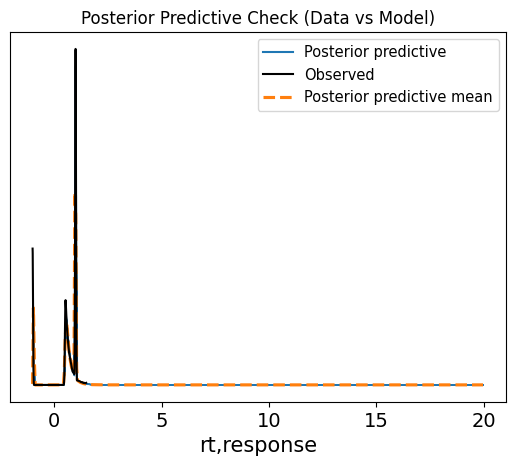

In [ ]:
# --- RUN IT ---
# Replace with your actual filename
assess_hssm_performance(trace)

## Another Run

In [ ]:
def run_model_2(df, samples=1000, burn=1000, chains=4, save_name="ms4_hssm_run2"):
    print(f"--- RUNNING MODEL 2: Reward + Travel Time ({save_name}) ---")

    # Removed 'z_trait_anxiety'
    v_formula = "v ~ 1 + z_reward + c_travel_time"
    a_formula = "a ~ 1 + z_reward + c_travel_time"
    z_formula = "z ~ 1"

    model = hssm.HSSM(
        data=df,
        model="ddm",
        loglik_kind="analytical",
        include=[
            {"name": "v", "formula": v_formula},
            {"name": "a", "formula": a_formula},
            {"name": "z", "formula": z_formula},
        ],
        p_outlier=0.05
    )

    print(f"Sampling with {chains} chains...")
    infer_data = model.sample(
        sampler="nuts_numpyro",
        draws=samples,
        tune=burn,
        chains=chains,
        cores=chains,
        target_accept=0.9
    )

    save_path = f"{save_name}.nc"
    infer_data.to_netcdf(save_path)
    print(f"Model 2 saved to {save_path}")
    return model, infer_data

In [ ]:
def run_model_3(df, samples=1000, burn=1000, chains=4, save_name="ms4_hssm_run3"):
    print(f"--- RUNNING MODEL 3: Anxiety Only ({save_name}) ---")

    # Only 'z_trait_anxiety'
    v_formula = "v ~ 1 + z_trait_anxiety"
    a_formula = "a ~ 1 + z_trait_anxiety"
    z_formula = "z ~ 1"

    model = hssm.HSSM(
        data=df,
        model="ddm",
        loglik_kind="analytical",
        include=[
            {"name": "v", "formula": v_formula},
            {"name": "a", "formula": a_formula},
            {"name": "z", "formula": z_formula},
        ],
        p_outlier=0.05
    )

    print(f"Sampling with {chains} chains...")
    infer_data = model.sample(
        sampler="nuts_numpyro",
        draws=samples,
        tune=burn,
        chains=chains,
        cores=chains,
        target_accept=0.9
    )

    save_path = f"{save_name}.nc"
    infer_data.to_netcdf(save_path)
    print(f"Model 3 saved to {save_path}")
    return model, infer_data

In [ ]:
# Assuming 'df' is already loaded and cleaned from your previous steps
model_2, trace_2 = run_model_2(df)

--- RUNNING MODEL 2: Reward + Travel Time (ms4_hssm_run2) ---
Model initialized successfully.


INFO:hssm:Model initialized successfully.


Sampling with 4 chains...
Using default initvals. 



INFO:hssm:Using default initvals. 

100%|██████████| 4000/4000 [04:11<00:00, 15.88it/s]


Model 2 saved to ms4_hssm_run2.nc


In [ ]:
import arviz as az


--- Summary Statistics for run 2 ---
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
v_z_reward       1.549  0.011   1.528    1.568        0.0      0.0    1805.0   
t                0.134  0.002   0.131    0.137        0.0      0.0    1905.0   
a_z_reward       0.199  0.004   0.192    0.207        0.0      0.0    1452.0   
a_c_travel_time -0.001  0.001  -0.003   -0.000        0.0      0.0    4297.0   
z_Intercept      0.543  0.003   0.537    0.549        0.0      0.0    1908.0   
v_Intercept      2.190  0.016   2.160    2.219        0.0      0.0    1829.0   
a_Intercept      1.064  0.008   1.049    1.080        0.0      0.0    1385.0   
v_c_travel_time  0.063  0.003   0.058    0.068        0.0      0.0    3865.0   

                 ess_tail  r_hat  
v_z_reward         2371.0    1.0  
t                  1892.0    1.0  
a_z_reward         2165.0    1.0  
a_c_travel_time    3379.0    1.0  
z_Intercept        2370.0    1.0  
v_Intercept        1993.0    1.

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

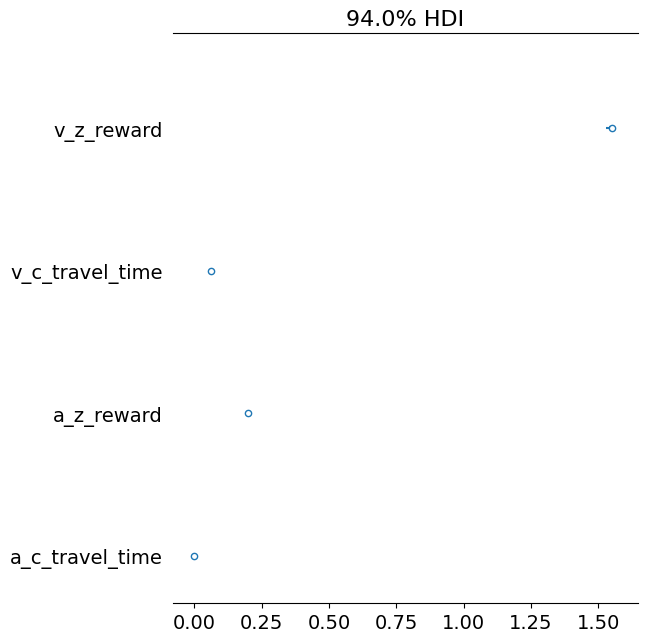

In [ ]:
# --- BLOCK 3: Inspect Results ---
print("\n--- Summary Statistics for run 2 ---")
print(az.summary(trace_2))

az.plot_forest(
    trace_2,
    var_names=[
        "v_z_reward", "v_c_travel_time",
        "a_z_reward", "a_c_travel_time"
    ],
    combined=True
)


No posterior_predictive samples found. Generating posterior_predictive samples using the provided InferenceData object and the original data. This will modify the provided InferenceData object, or if not provided, the traces object stored inside the model.


INFO:hssm:No posterior_predictive samples found. Generating posterior_predictive samples using the provided InferenceData object and the original data. This will modify the provided InferenceData object, or if not provided, the traces object stored inside the model.


AttributeError: 'HSSM' object has no attribute 'plot_trace_2'

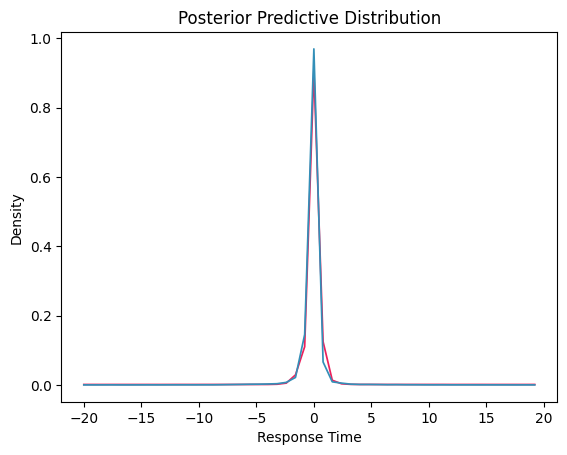

In [ ]:
model_2.plot_predictive()

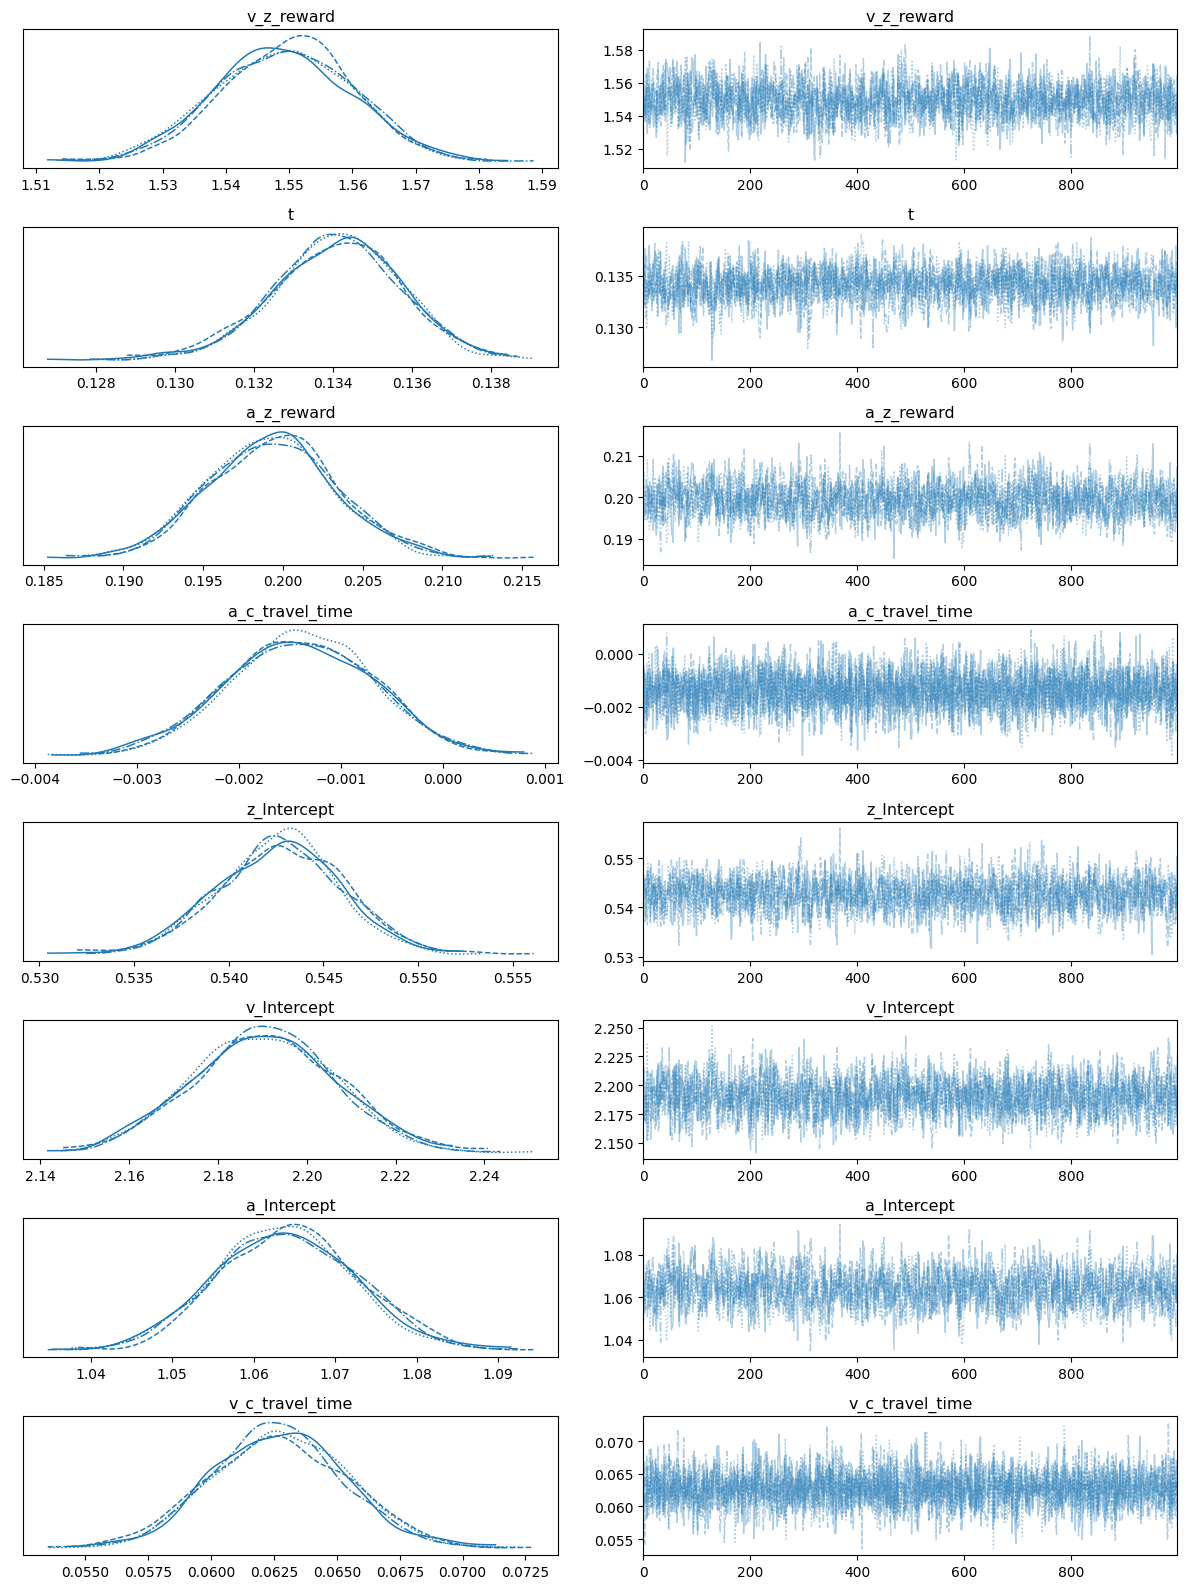

In [ ]:
model_2.plot_trace()

In [ ]:
model_3, trace_3 = run_model_3(df)

--- RUNNING MODEL 3: Anxiety Only (ms4_hssm_run3) ---
Model initialized successfully.


INFO:hssm:Model initialized successfully.


Sampling with 4 chains...
Using default initvals. 



INFO:hssm:Using default initvals. 

100%|██████████| 4000/4000 [03:27<00:00, 19.32it/s]


Model 3 saved to ms4_hssm_run3.nc



--- Summary Statistics for run 3 ---
                    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
a_z_trait_anxiety -0.020  0.002  -0.023   -0.017        0.0      0.0   
t                  0.187  0.001   0.185    0.188        0.0      0.0   
v_Intercept        1.763  0.014   1.738    1.790        0.0      0.0   
z_Intercept        0.449  0.002   0.445    0.454        0.0      0.0   
v_z_trait_anxiety -0.009  0.010  -0.028    0.010        0.0      0.0   
a_Intercept        0.649  0.002   0.646    0.653        0.0      0.0   

                   ess_bulk  ess_tail  r_hat  
a_z_trait_anxiety    4399.0    3351.0    1.0  
t                    2595.0    3014.0    1.0  
v_Intercept          1727.0    2711.0    1.0  
z_Intercept          1820.0    2415.0    1.0  
v_z_trait_anxiety    2316.0    2527.0    1.0  
a_Intercept          3243.0    2975.0    1.0  


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

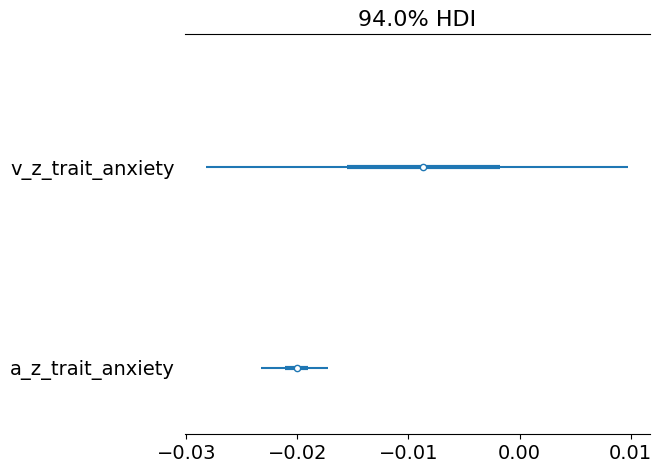

In [ ]:
# --- BLOCK 3: Inspect Results ---
print("\n--- Summary Statistics for run 3 ---")
print(az.summary(trace_3))

az.plot_forest(
    trace_3,
    var_names=[
        "v_z_trait_anxiety",
        "a_z_trait_anxiety"
    ],
    combined=True
)


No posterior_predictive samples found. Generating posterior_predictive samples using the provided InferenceData object and the original data. This will modify the provided InferenceData object, or if not provided, the traces object stored inside the model.


INFO:hssm:No posterior_predictive samples found. Generating posterior_predictive samples using the provided InferenceData object and the original data. This will modify the provided InferenceData object, or if not provided, the traces object stored inside the model.


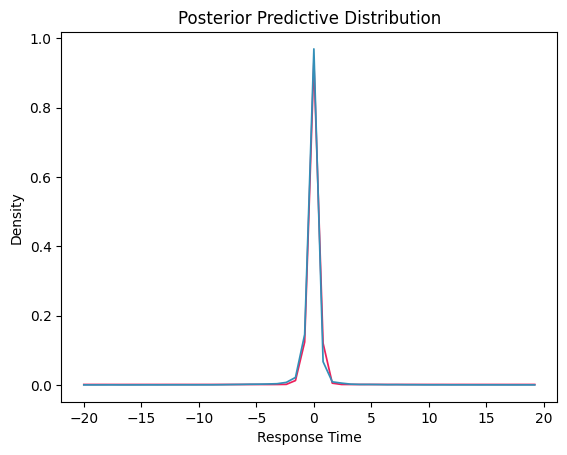

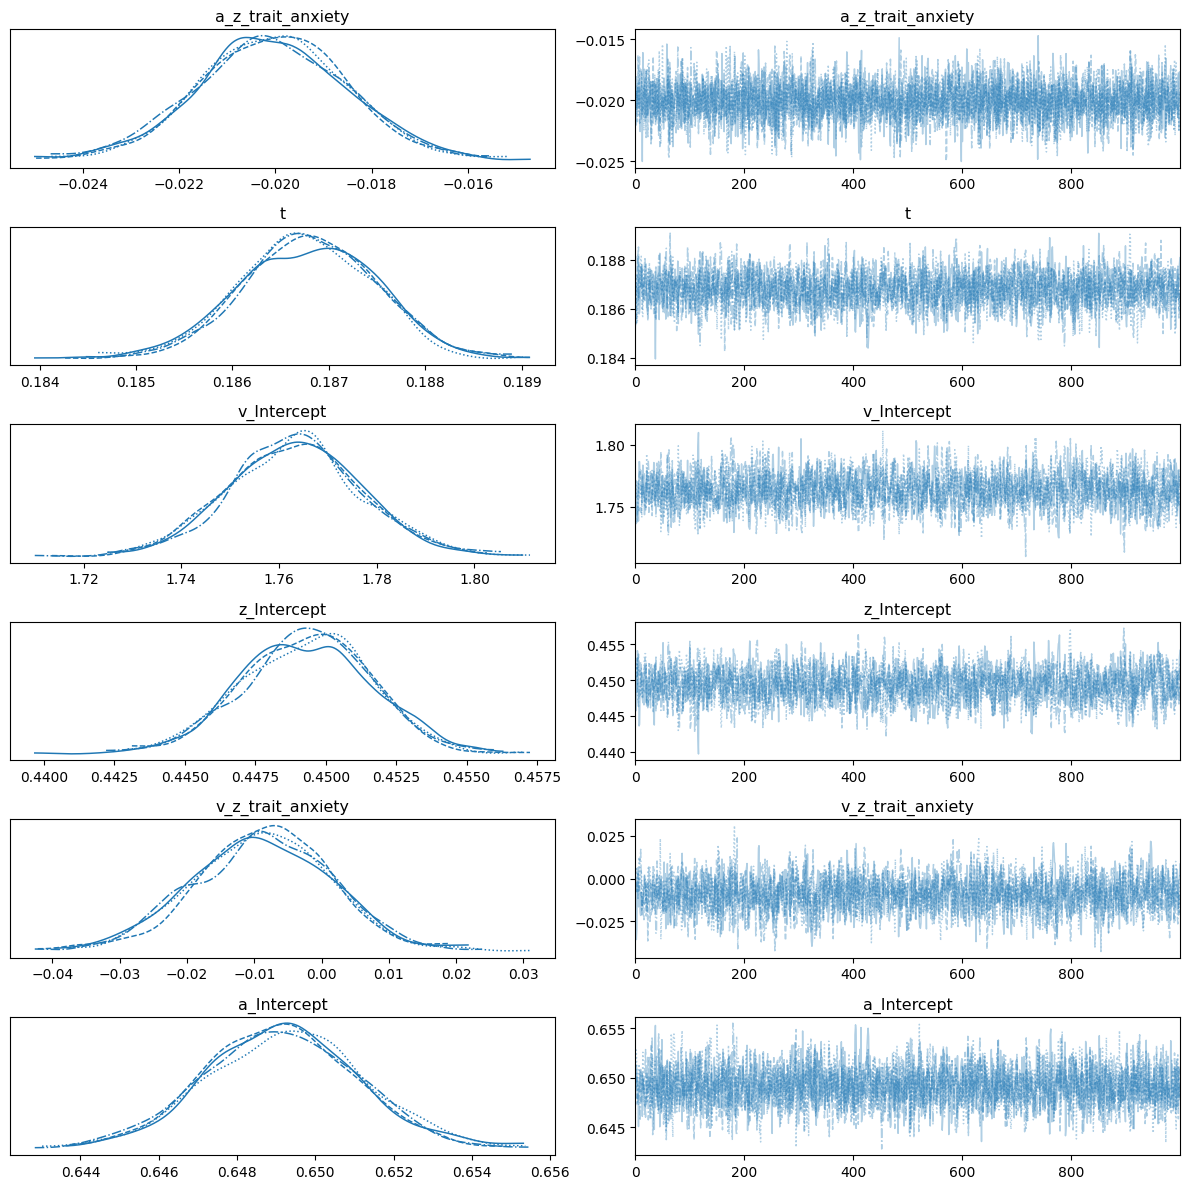

In [ ]:
model_3.plot_predictive()
model_3.plot_trace()